In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
from livelossplot import PlotLossesKeras
import os

In [77]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6643264371501664691
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3157314764
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18002528196049991271
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [78]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [79]:
path = "cell_images"

In [80]:
TRAINING_LOGS_FILE = "training_logs.csv"
TEST_LOGS_FILE = "test_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
TEST_FILE = "test_file.txt"
MODEL_FILE = "model.h5"

In [81]:
training_data_dir = path + "/training"
validation_data_dir = path + "/validation"
test_data_dir = path + "/test"

In [82]:
IMAGE_SIZE = 200
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 30
BATCH_SIZE = 32
TEST_SIZE = 30

In [83]:
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [84]:
model = Sequential()

# Dont run this

In [85]:
model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
    
model.compile(loss='binary_crossentropy',
            optimizer="adadelta",
            metrics=['accuracy'])
model.summary()

C:\Users\Aiman\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., activation="relu", padding="same")`
  """Entry point for launching an IPython kernel.
C:\Users\Aiman\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  
C:\Users\Aiman\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  """
C:\Users\Aiman\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\Aiman\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipyker

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 50, 50, 128)       73856     
__________

In [13]:
model.layers

In [38]:
model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
#model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
#model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
#model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Flatten())
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))

#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('softmax'))
    
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

#model.compile(loss='binary_crossentropy',
#            optimizer=RMSprop(lr=0.0001),
 #           metrics=[precision, recall])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 44, 44, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 44, 44, 32)        9248      
_________________________________________________________________
dense_6 (Dense)              (None, 44, 44, 1)         33        
_________________________________________________________________
activation_3 (Activation)    (None, 44, 44, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 44, 44, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 32)        0         
__________

C:\Users\Aiman\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(44, 44, 3..., activation="relu", padding="same")`
  """Entry point for launching an IPython kernel.
C:\Users\Aiman\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  


In [86]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [87]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 27558 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


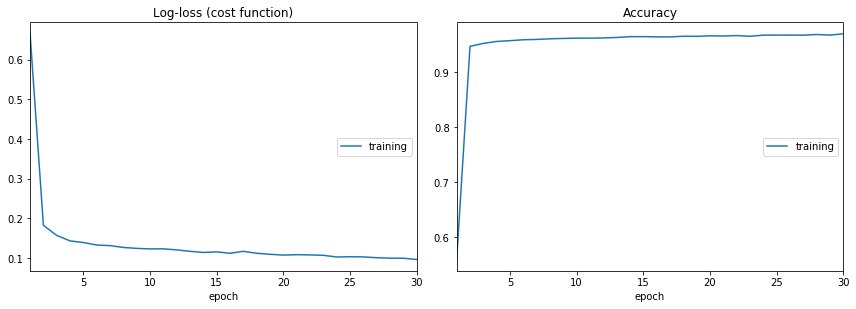

In [88]:
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    #validation_data=validation_generator,
    #validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], verbose=1)

model.save_weights(MODEL_FILE)

def as_keras_metric(method):
    import functools
    from keras import backend as K
    import tensorflow as tf
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper

In [46]:
import functools
from keras import backend as K
import tensorflow as tf

In [48]:
precision = as_keras_metric(tf.metrics.precision)
recall = as_keras_metric(tf.metrics.recall)

In [89]:
import pandas as pd

In [90]:
history = pd.read_csv('training_logs.csv')

In [91]:
history

,epoch;acc;loss
0,0;0.5596689895470384;0.6655358702515476
1,1;0.9467775920947468;0.1822377434501797
2,2;0.9521543268139501;0.1567022700804936
3,3;0.9556419385265128;0.1429095046994931
4,4;0.9570587807890721;0.13875340623642365
5,5;0.9586935987793359;0.13255231924561284
6,6;0.9593475259711106;0.1309583381079297
7,7;0.9604374046356172;0.12636111680563605
8,8;0.9611276611203953;0.12400591717635982
9,9;0.9616362711618106;0.12267529929218762


In [99]:
model.evaluate_generator(test_generator, steps=len(test_generator))

[0.13918823104511754, 0.9664654594232059]

In [78]:
model.metrics_names

['loss', 'acc']

ModuleNotFoundError: No module named 'keras_metrics'